### 1. Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

1-1. MultiIndex (YYYY-MM-DD-Location)

In [2]:
data_path = '/Users/park/Desktop/data/'

csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

data_df = []
for csv_file in csv_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path, sep=';') 
    file_location = csv_file.split('_')[-1].split('.')[0]
    df['Location'] = int(file_location)
    data_df.append(df)
    
data = pd.concat(data_df, ignore_index=True)
data.set_index(['YYYY', 'MM', 'DD', 'Location'], inplace=True)
display(data)


DOY  2m_temp_max  2m_temp_mean  2m_temp_min  \
YYYY MM DD Location                                                
1981 1  1  45          1         -8.1         -10.6        -14.6   
        2  45          2        -11.5         -13.3        -15.1   
        3  45          3         -6.0          -8.6        -12.9   
        4  45          4         -5.3          -8.2        -13.8   
        5  45          5        -13.8         -15.5        -16.6   
...                  ...          ...           ...          ...   
2019 12 27 620       361          2.4           1.3          0.0   
        28 620       362          0.5          -2.1         -5.5   
        29 620       363          1.8          -3.9         -6.6   
        30 620       364          4.4          -2.6         -6.1   
        31 620       365          5.6          -0.7         -4.5   

                     2m_dp_temp_max  2m_dp_temp_mean  2m_dp_temp_min  \
YYYY MM DD Location                                                    
1981 1  1  45                 -11.5            -15.3           -18.9   
        2  45                 -13.4            -15.5           -16.9   
        3  45                  -7.0            -10.7           -14.3   
        4  45                  -6.8             -9.6           -16.5   
        5  45                 -16.7            -18.2           -19.6   
...                             ...              ...             ...   
2019 12 27 620                  1.4              0.4            -2.2   
        28 620                 -0.5             -3.7            -7.2   
        29 620                 -4.5             -7.6            -9.6   
        30 620                 -2.7             -7.6           -12.4   
        31 620                 -0.8             -5.1            -7.8   

                     10m_wind_u  10m_wind_v  fcst_alb  ...     swe  \
YYYY MM DD Location                                    ...           
1981 1  1  45               0.5        -0.8      0.63  ...  398.22   
        2  45               0.4        -0.6      0.65  ...  404.12   
        3  45               0.4        -0.3      0.66  ...  411.26   
        4  45               0.7        -0.6      0.67  ...  429.33   
        5  45               0.9        -1.3      0.68  ...  443.55   
...                         ...         ...       ...  ...     ...   
2019 12 27 620              0.9         0.6      0.28  ...   58.10   
        28 620             -1.4        -0.4      0.27  ...   59.43   
        29 620             -1.2         0.2      0.27  ...   59.20   
        30 620             -0.4         0.9      0.27  ...   58.84   
        31 620              0.4         1.2      0.26  ...   58.39   

                     surf_net_solar_rad_max  surf_net_solar_rad_mean  \
YYYY MM DD Location                                                    
1981 1  1  45                            76                       15   
        2  45                           109                       22   
        3  45                            89                       19   
        4  45                            57                       11   
        5  45                            73                       14   
...                                     ...                      ...   
2019 12 27 620                           43                        9   
        28 620                          171                       36   
        29 620                          217                       46   
        30 620                          214                       44   
        31 620                          220                       46   

                     surf_net_therm_rad_max  surf_net_therm_rad_mean  \
YYYY MM DD Location                                                    
1981 1  1  45                            32                       12   
        2  45                            58                       20   
        3  45                            32                    

1-2. Distribution

Precipitation

Mean: 3.514931339511374
Median: 0.97
Standard Deviation: 5.8221922347778765
Variance: 33.89792241870781
Min: 0.0
Max: 121.37


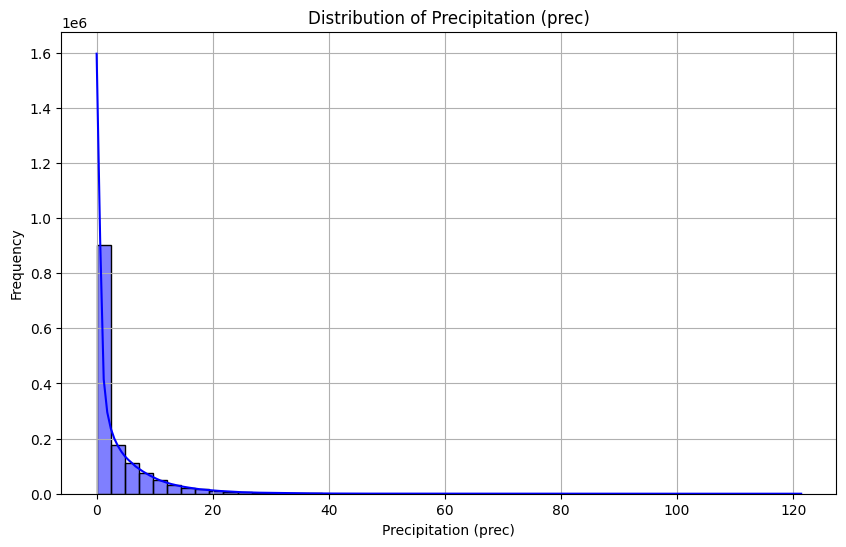

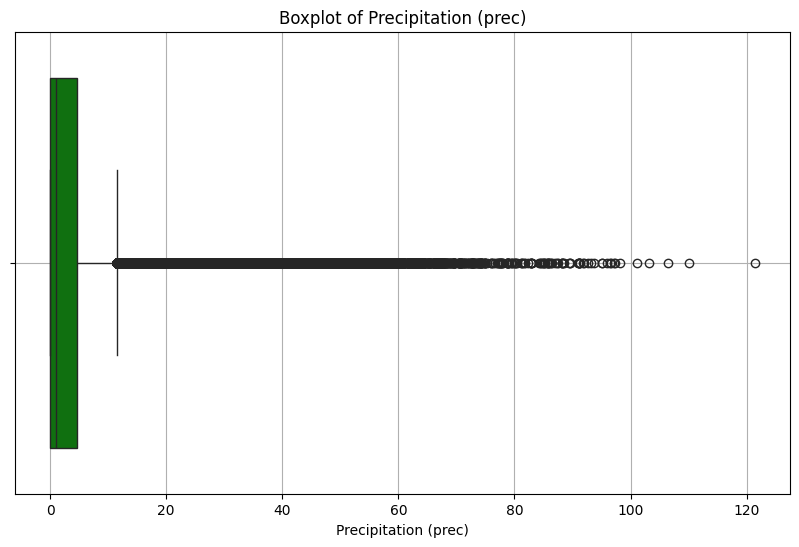

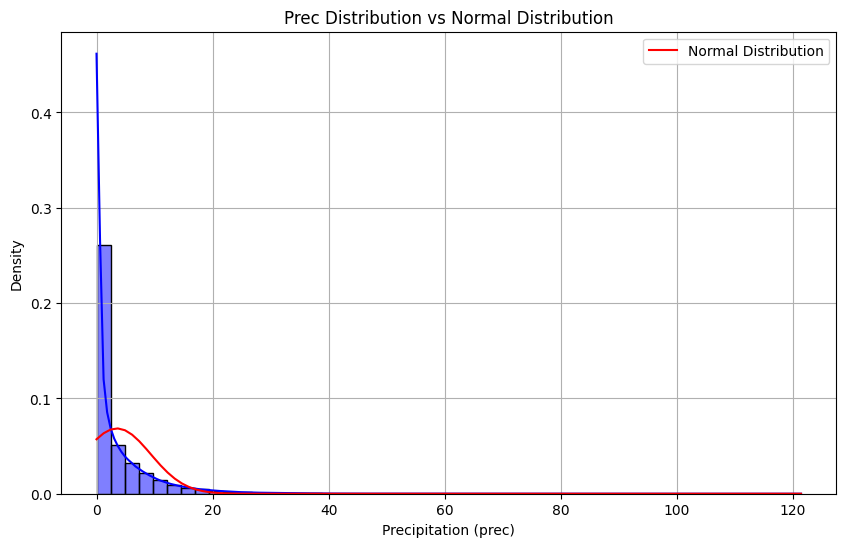

In [3]:
import scipy.stats as stats

mean_prec = data['prec'].mean()
median_prec = data['prec'].median()
std_prec = data['prec'].std()
variance_prec = data['prec'].var()
min_prec = data['prec'].min()
max_prec = data['prec'].max()

print(f'Mean: {mean_prec}')
print(f'Median: {median_prec}')
print(f'Standard Deviation: {std_prec}')
print(f'Variance: {variance_prec}')
print(f'Min: {min_prec}')
print(f'Max: {max_prec}')

plt.figure(figsize=(10, 6))
sns.histplot(data['prec'], kde=True, color='blue', bins=50)
plt.title('Distribution of Precipitation (prec)')
plt.xlabel('Precipitation (prec)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['prec'], color='green')
plt.title('Boxplot of Precipitation (prec)')
plt.xlabel('Precipitation (prec)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['prec'], kde=True, color='blue', bins=50, stat='density')
x = np.linspace(data['prec'].min(), data['prec'].max(), 100)
plt.plot(x, stats.norm.pdf(x, mean_prec, std_prec), 'r', label='Normal Distribution')
plt.title('Prec Distribution vs Normal Distribution')
plt.xlabel('Precipitation (prec)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


All the Variables

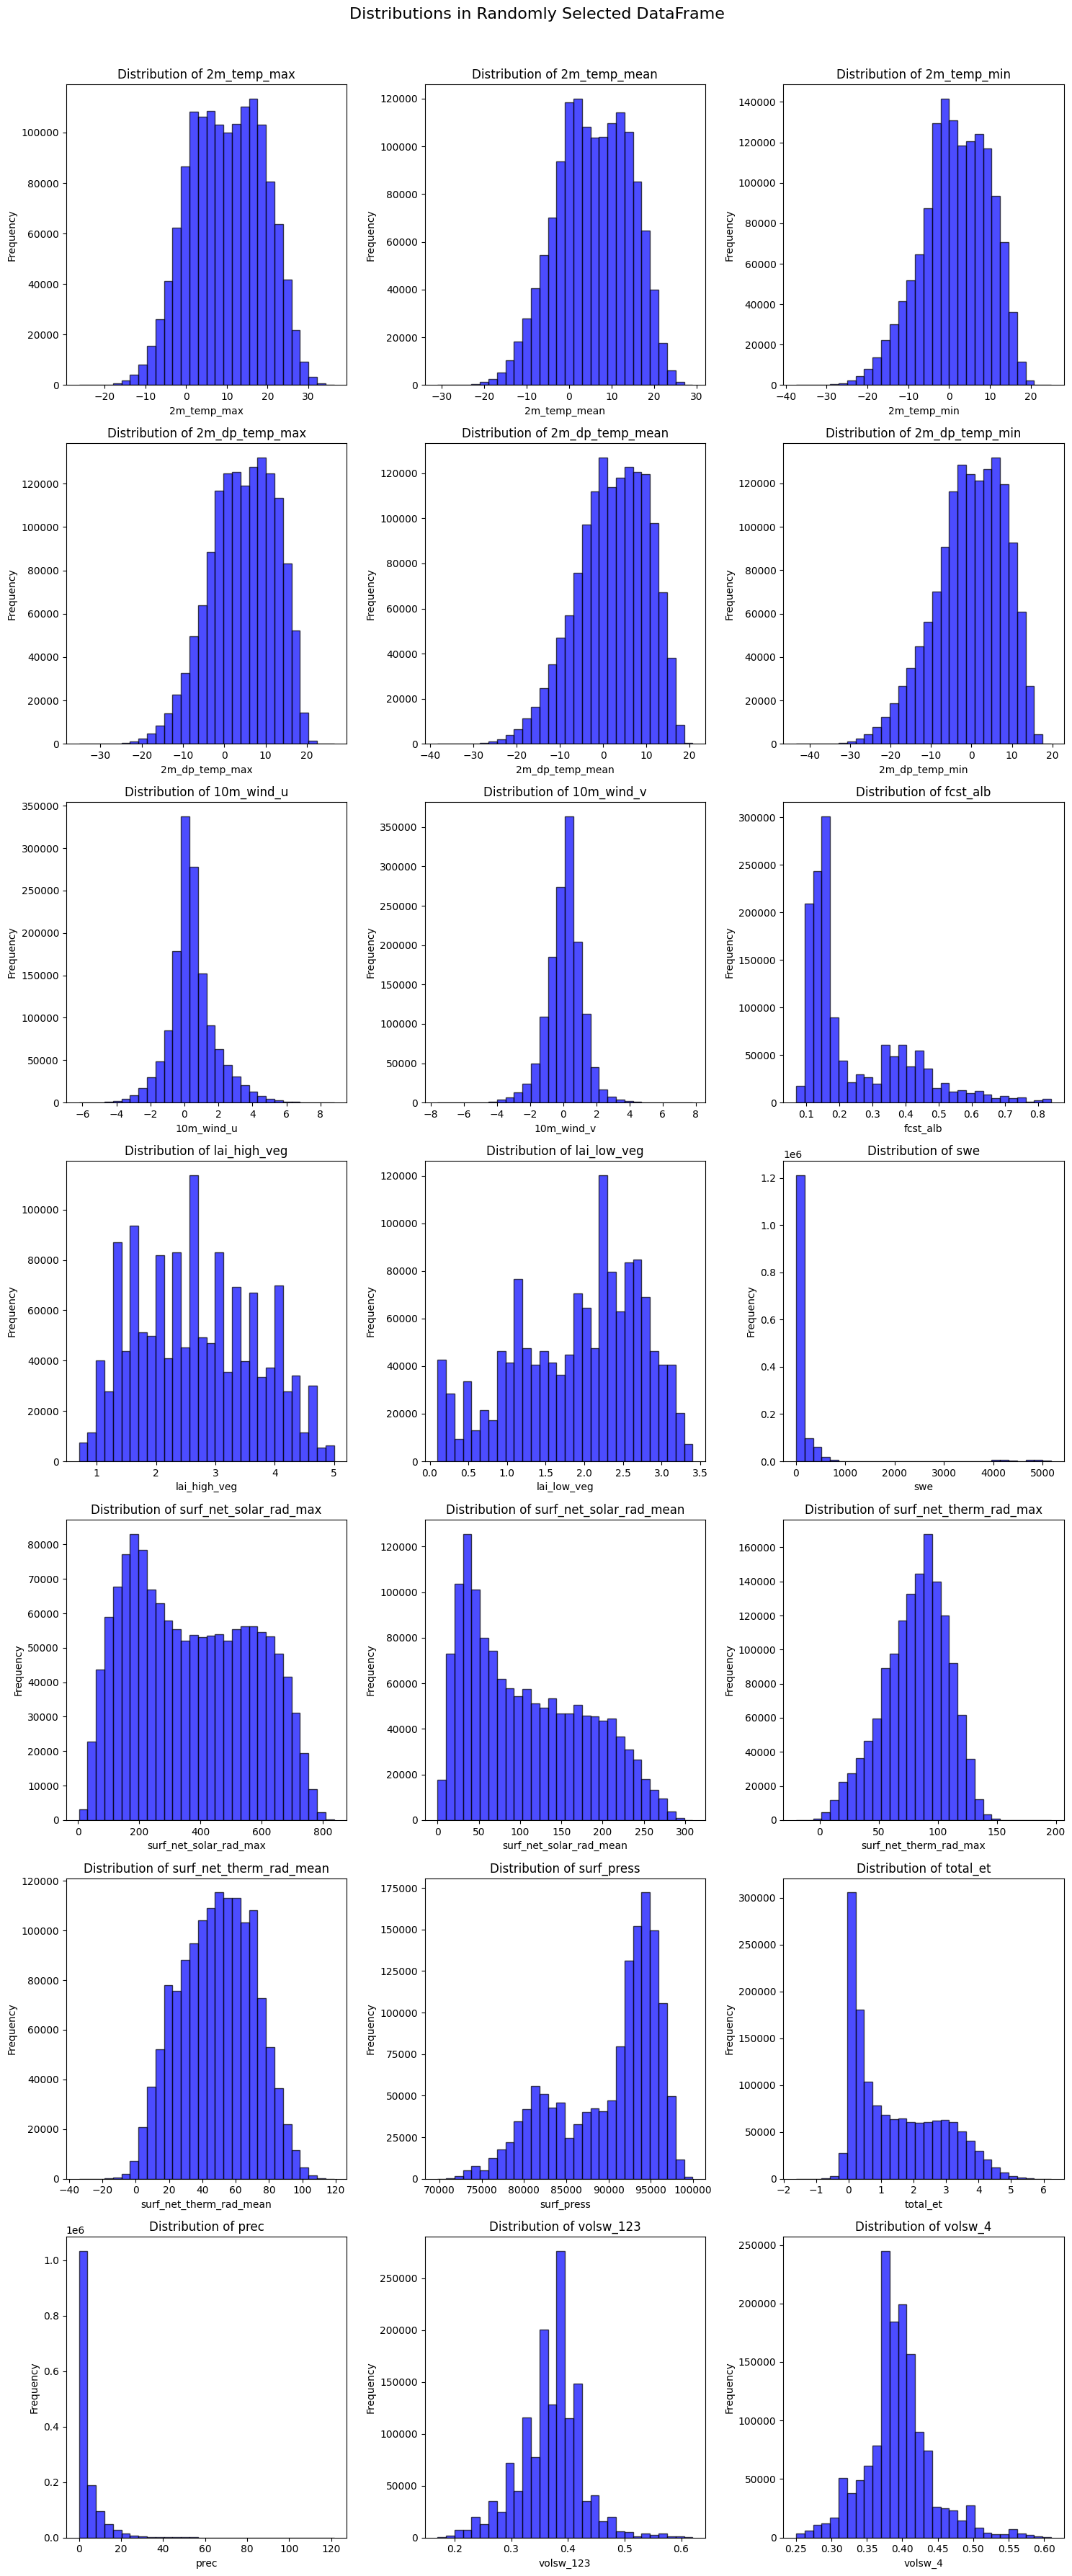

In [4]:
numeric_columns = [column for column in data.columns[1:] if pd.api.types.is_numeric_dtype(data[column])]
if numeric_columns:
    plt.figure(figsize=(15, 5 * ((len(numeric_columns) + 2) // 3)))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
        plt.hist(data[column].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.suptitle('Distributions in Randomly Selected DataFrame', y=1.02, fontsize=16)
    plt.show()

1-3. Missing Data

In [5]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    random_missing_column = random.choice(missing_values.index)

    missing_indices = data[data[random_missing_column].isnull()].index
    if len(missing_indices) > 0:
        sample_index = random.choice(missing_indices)
        start_idx = max(0, sample_index - 3)
        end_idx = min(len(data), sample_index + 4)
        sample_data = data.iloc[start_idx:end_idx]

        plt.figure(figsize=(10, 6))
        plt.plot(sample_data.index, sample_data[random_missing_column], marker='o', linestyle='-', color='blue')
        plt.title(f'Selected Missing Value in {random_missing_column}', fontsize=16)
        plt.xlabel('Index', fontsize=12)
        plt.ylabel(random_missing_column, fontsize=12)
        plt.axvline(x=sample_index, color='red', linestyle='--', label='Missing Value')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


1-4. Outliers

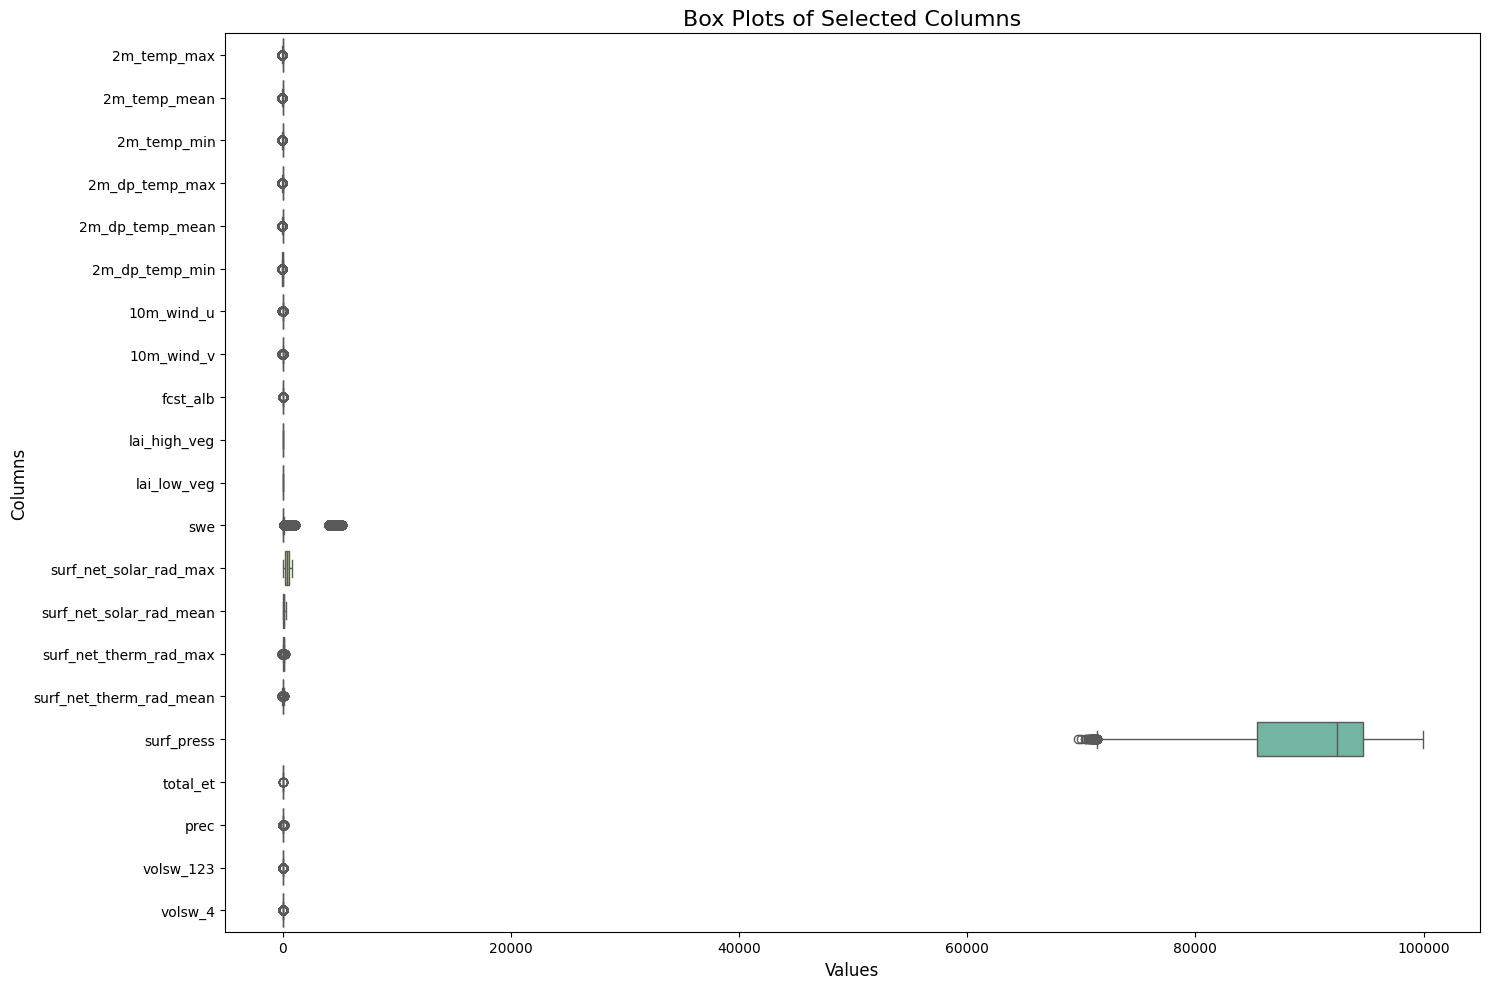

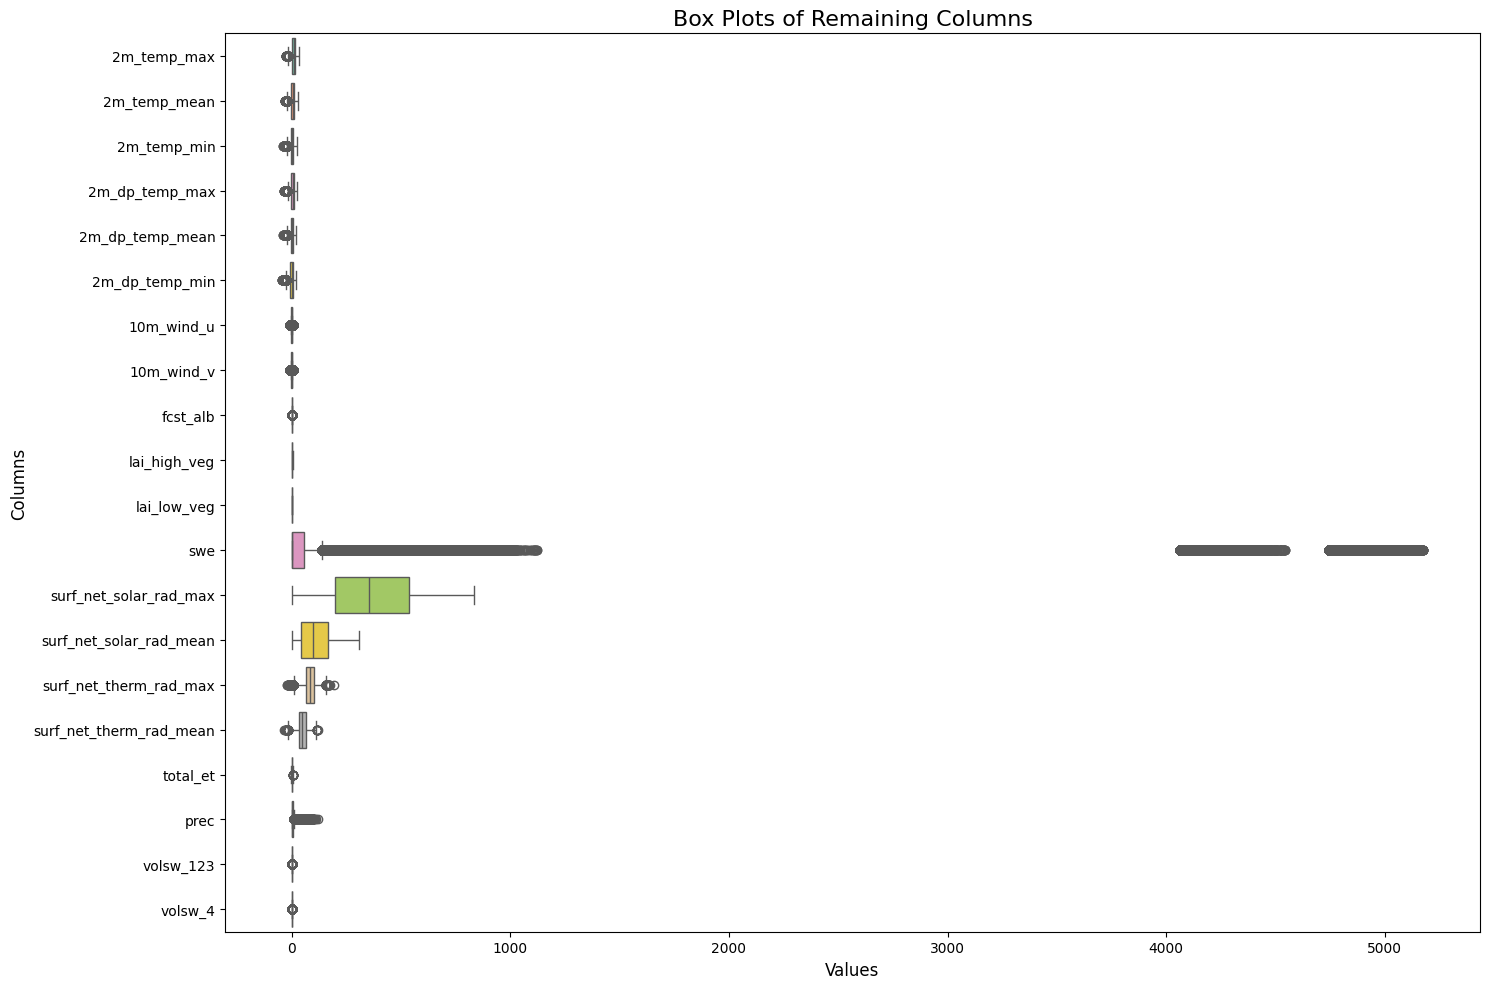

In [6]:
boxplot_columns = data.columns[1:]
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[boxplot_columns], orient='h', palette='Set2')
plt.title('Box Plots of Selected Columns', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

remaining_columns = [col for col in data.columns[1:] if col != 'surf_press']
if remaining_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data[remaining_columns], orient='h', palette='Set2')
    plt.title('Box Plots of Remaining Columns', fontsize=16)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.tight_layout()
    plt.show()

1-5. Correlation

In [8]:
Data = data.reset_index()

correlation_with_id = Data.corrwith(Data['prec'])
pd.options.display.float_format = '{:f}'.format

correlation_with_id

YYYY                       0.003805
MM                         0.016806
DD                        -0.012793
Location                  -0.087688
DOY                        0.015191
2m_temp_max               -0.024733
2m_temp_mean               0.046086
2m_temp_min                0.120275
2m_dp_temp_max             0.144832
2m_dp_temp_mean            0.157957
2m_dp_temp_min             0.155680
10m_wind_u                 0.219218
10m_wind_v                -0.037316
fcst_alb                   0.006960
lai_high_veg               0.163092
lai_low_veg                0.007059
swe                        0.009487
surf_net_solar_rad_max    -0.220597
surf_net_solar_rad_mean   -0.205307
surf_net_therm_rad_max    -0.479272
surf_net_therm_rad_mean   -0.497617
surf_press                -0.114117
total_et                   0.010284
prec                       1.000000
volsw_123                  0.066936
volsw_4                    0.047627
dtype: float64

### 2. Preprocessing

2-1. Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = Data.iloc[:, :-1]
y = Data['prec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2-2. Scaling with Robust Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# make it as dataframe for visualization
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

display(pd.DataFrame(X_train_df))

,YYYY,MM,DD,Location,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,...,lai_low_veg,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123
0,0.210526,0.909091,0.300000,0.993031,0.857534,0.527157,0.546848,0.603200,0.625828,0.654237,...,0.666667,0.000000,0.324910,0.198697,0.581395,0.688742,0.887380,0.275288,0.000000,0.400000
1,0.815789,0.363636,0.000000,0.973287,0.331507,0.843450,0.831346,0.780800,0.798013,0.823729,...,0.848485,0.000000,0.803851,0.657980,0.595349,0.668874,0.904666,0.705506,0.009887,0.311111
2,0.842105,0.363636,0.200000,0.638792,0.345205,0.651757,0.678024,0.680000,0.754967,0.791525,...,0.757576,0.000000,0.441637,0.403909,0.395349,0.463576,0.635981,0.464789,0.036830,0.488889
3,0.947368,0.363636,0.533333,0.747967,0.372603,0.792332,0.804089,0.772800,0.788079,0.823729,...,0.545455,0.000000,0.833935,0.817590,0.600000,0.748344,0.889202,0.718310,0.000000,0.488889
4,0.368421,0.181818,0.466667,0.624855,0.200000,0.372204,0.383305,0.409600,0.455298,0.477966,...,0.242424,0.060906,0.253911,0.198697,0.316279,0.450331,0.341866,0.216389,0.006262,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997075,0.184211,0.636364,0.566667,0.891986,0.630137,0.800319,0.809199,0.776000,0.859272,0.879661,...,0.000000,0.000000,0.803851,0.726384,0.627907,0.748344,0.755422,0.700384,0.000000,0.377778
997076,0.289474,0.636364,0.933333,0.709640,0.660274,0.841853,0.833049,0.832000,0.827815,0.854237,...,0.575758,0.000000,0.677497,0.530945,0.576744,0.649007,0.693798,0.615877,0.031639,0.288889
997077,0.263158,0.181818,0.833333,0.693380,0.230137,0.517572,0.575809,0.636800,0.668874,0.703390,...,0.848485,0.000023,0.383875,0.218241,0.306977,0.304636,0.622868,0.336748,0.094175,0.533333
997078,0.105263,0.636364,0.466667,0.587689,0.619178,0.841853,0.865417,0.814400,0.874172,0.900000,...,0.575758,0.000000,0.808664,0.732899,0.576744,0.715232,0.763237,0.718310,0.000165,0.355556


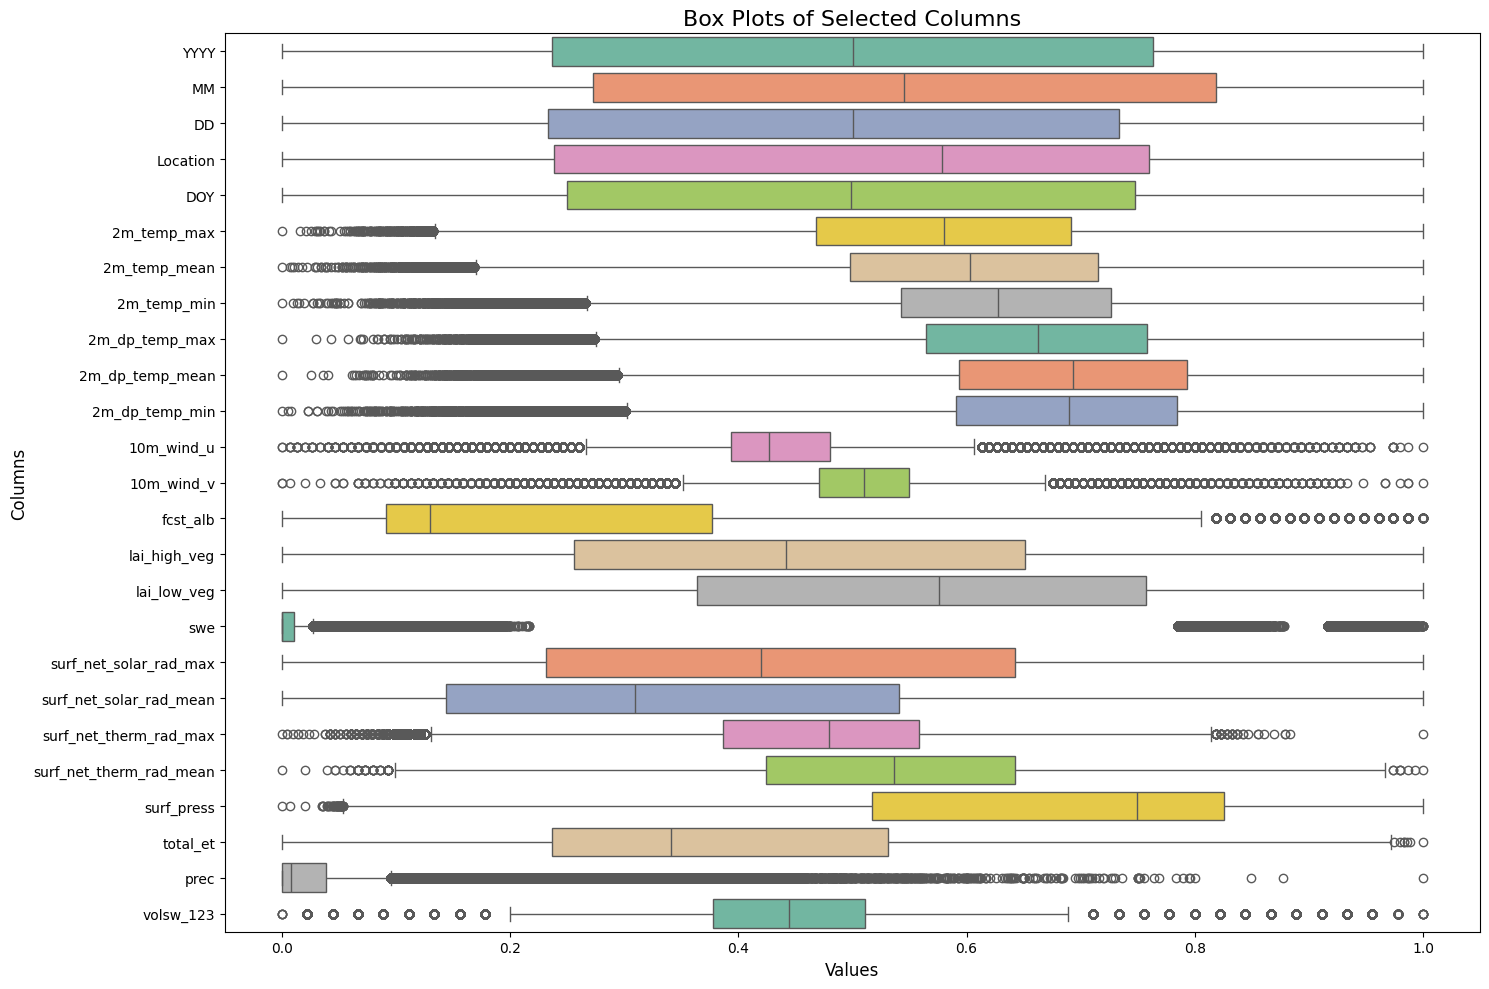

In [13]:
boxplot_columns = [col for col in X_train_df.columns]
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_df[boxplot_columns], orient='h', palette='Set2')
plt.title('Box Plots of Selected Columns', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()